# Wine Quality Prediction Supervised Leaning

Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,recall_score, balanced_accuracy_score,f1_score, mean_squared_error
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import time
import warnings
warnings.filterwarnings('ignore')

<h3>Read the Data</h3>

In [2]:
data = pd.read_csv('../data/wineQualityDataset/WineQT.csv', sep=',')
#data = pd.read_excel('../data/Raisin_Dataset/Raisin_Dataset.xlsx' , sheet_name = 'Raisin_Dataset')
# print(data.shape)
# data.head(5)
# get data info
print(data.shape)
data.info()

(1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<h3>Multiclass output(y)</h3>

In [3]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
data.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [5]:
# # Applying the condition
# data.loc[data["quality"] < 6, "quality"] = 0
# data.loc[data["quality"] >= 6, "quality"] = 1

In [6]:
data.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [7]:
#Drop id
data = data.drop("Id", axis=1)

In [8]:
data.duplicated().value_counts()

False    1018
True      125
dtype: int64

In [9]:
#drop duplicate
data = data.drop_duplicates().reset_index(drop=True)

In [10]:
data.quality.value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

In [11]:
data[(data.quality == 3)].index

Int64Index([293, 332, 823, 929, 937, 954], dtype='int64')

In [12]:
data = data.drop(data[data.quality == 3].index).reset_index(drop=True)
data = data.drop(data[data.quality == 4].index).reset_index(drop=True)
#data = data.drop(data[data.quality == 8].index).reset_index(drop=True)
data.loc[data["quality"] == 8, "quality"] = 7


In [13]:
data.quality.value_counts()

5    433
6    409
7    137
Name: quality, dtype: int64

<h3> Balance Check on Dataset</h3>

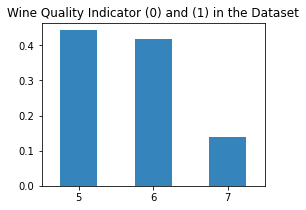

In [14]:

fig = plt.figure(figsize = (4,3))
data.quality.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0)
plt.title('Wine Quality Indicator (0) and (1) in the Dataset')
plt.show()

5    433
6    409
7    137
Name: quality, dtype: int64


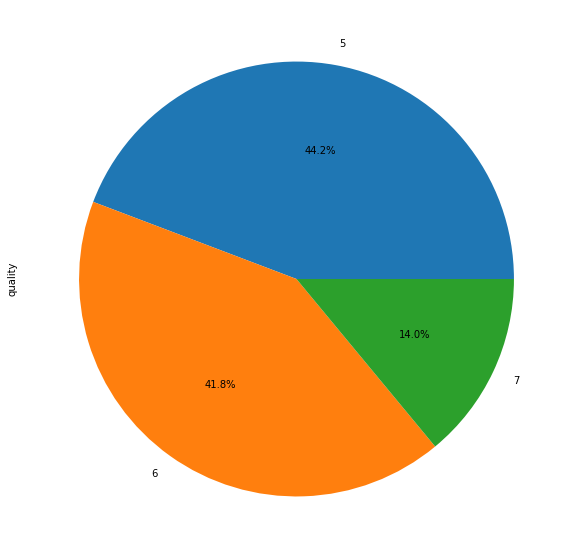

In [15]:
print(data["quality"].value_counts())
data["quality"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<h1>Undersatnding Data </h1>
<ul>
    <li>1 - fixed acidity</li>
    <li>2 - volatile acidity</li>
    <li>3 - citric acid</li>
    <li>4 - residual sugar</li>
    <li>5 - chlorides</li>
    <li>6 - free sulfur dioxide</li>
    <li>7 - total sulfur dioxide</li>
    <li>8 - density</li>
    <li>9 - pH</li>
    <li>10 - sulphates</li>
    <li>11 - alcohol</li>
    <li>12 - quality (score between 0 and 10, updated to binary)</li>
    </ul>

In [16]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [17]:
data.describe().T

count       mean        std      min        25%  \
fixed acidity         979.0   8.303677   1.740944  4.90000   7.100000   
volatile acidity      979.0   0.525700   0.175660  0.12000   0.390000   
citric acid           979.0   0.272625   0.194334  0.00000   0.100000   
residual sugar        979.0   2.522114   1.319032  0.90000   1.900000   
chlorides             979.0   0.086819   0.046190  0.01200   0.070000   
free sulfur dioxide   979.0  15.721655  10.184238  1.00000   7.000000   
total sulfur dioxide  979.0  46.652196  33.294294  6.00000  22.000000   
density               979.0   0.996695   0.001921  0.99007   0.995555   
pH                    979.0   3.308509   0.155179  2.86000   3.205000   
sulphates             979.0   0.658110   0.162079  0.39000   0.560000   
alcohol               979.0  10.463585   1.097083  8.40000   9.500000   
quality               979.0   5.697651   0.700938  5.00000   5.000000   

                           50%        75%        max  
fixed acidity          7.90000   9.100000   15.90000  
volatile acidity       0.52000   0.640000    1.33000  
citric acid            0.26000   0.420000    0.79000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   68.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99666   0.997825    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    1.95000  
alcohol               10.20000  11.200000   14.90000  
quality                6.00000   6.000000    7.00000

<H2>CORRELATION MATRIX</H2>
<h3>Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” 
 function and can visualize the correlation matrix using plotly express.</h3>
<ul>
    <li>Lighter shades represents positive correlation</li>
    <li>Darker shades represents negative correlation</li>
</ul>

In [18]:
px.imshow(data.corr(),title="Correlation Plot, Wine Quality")

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1080x720 with 0 Axes>

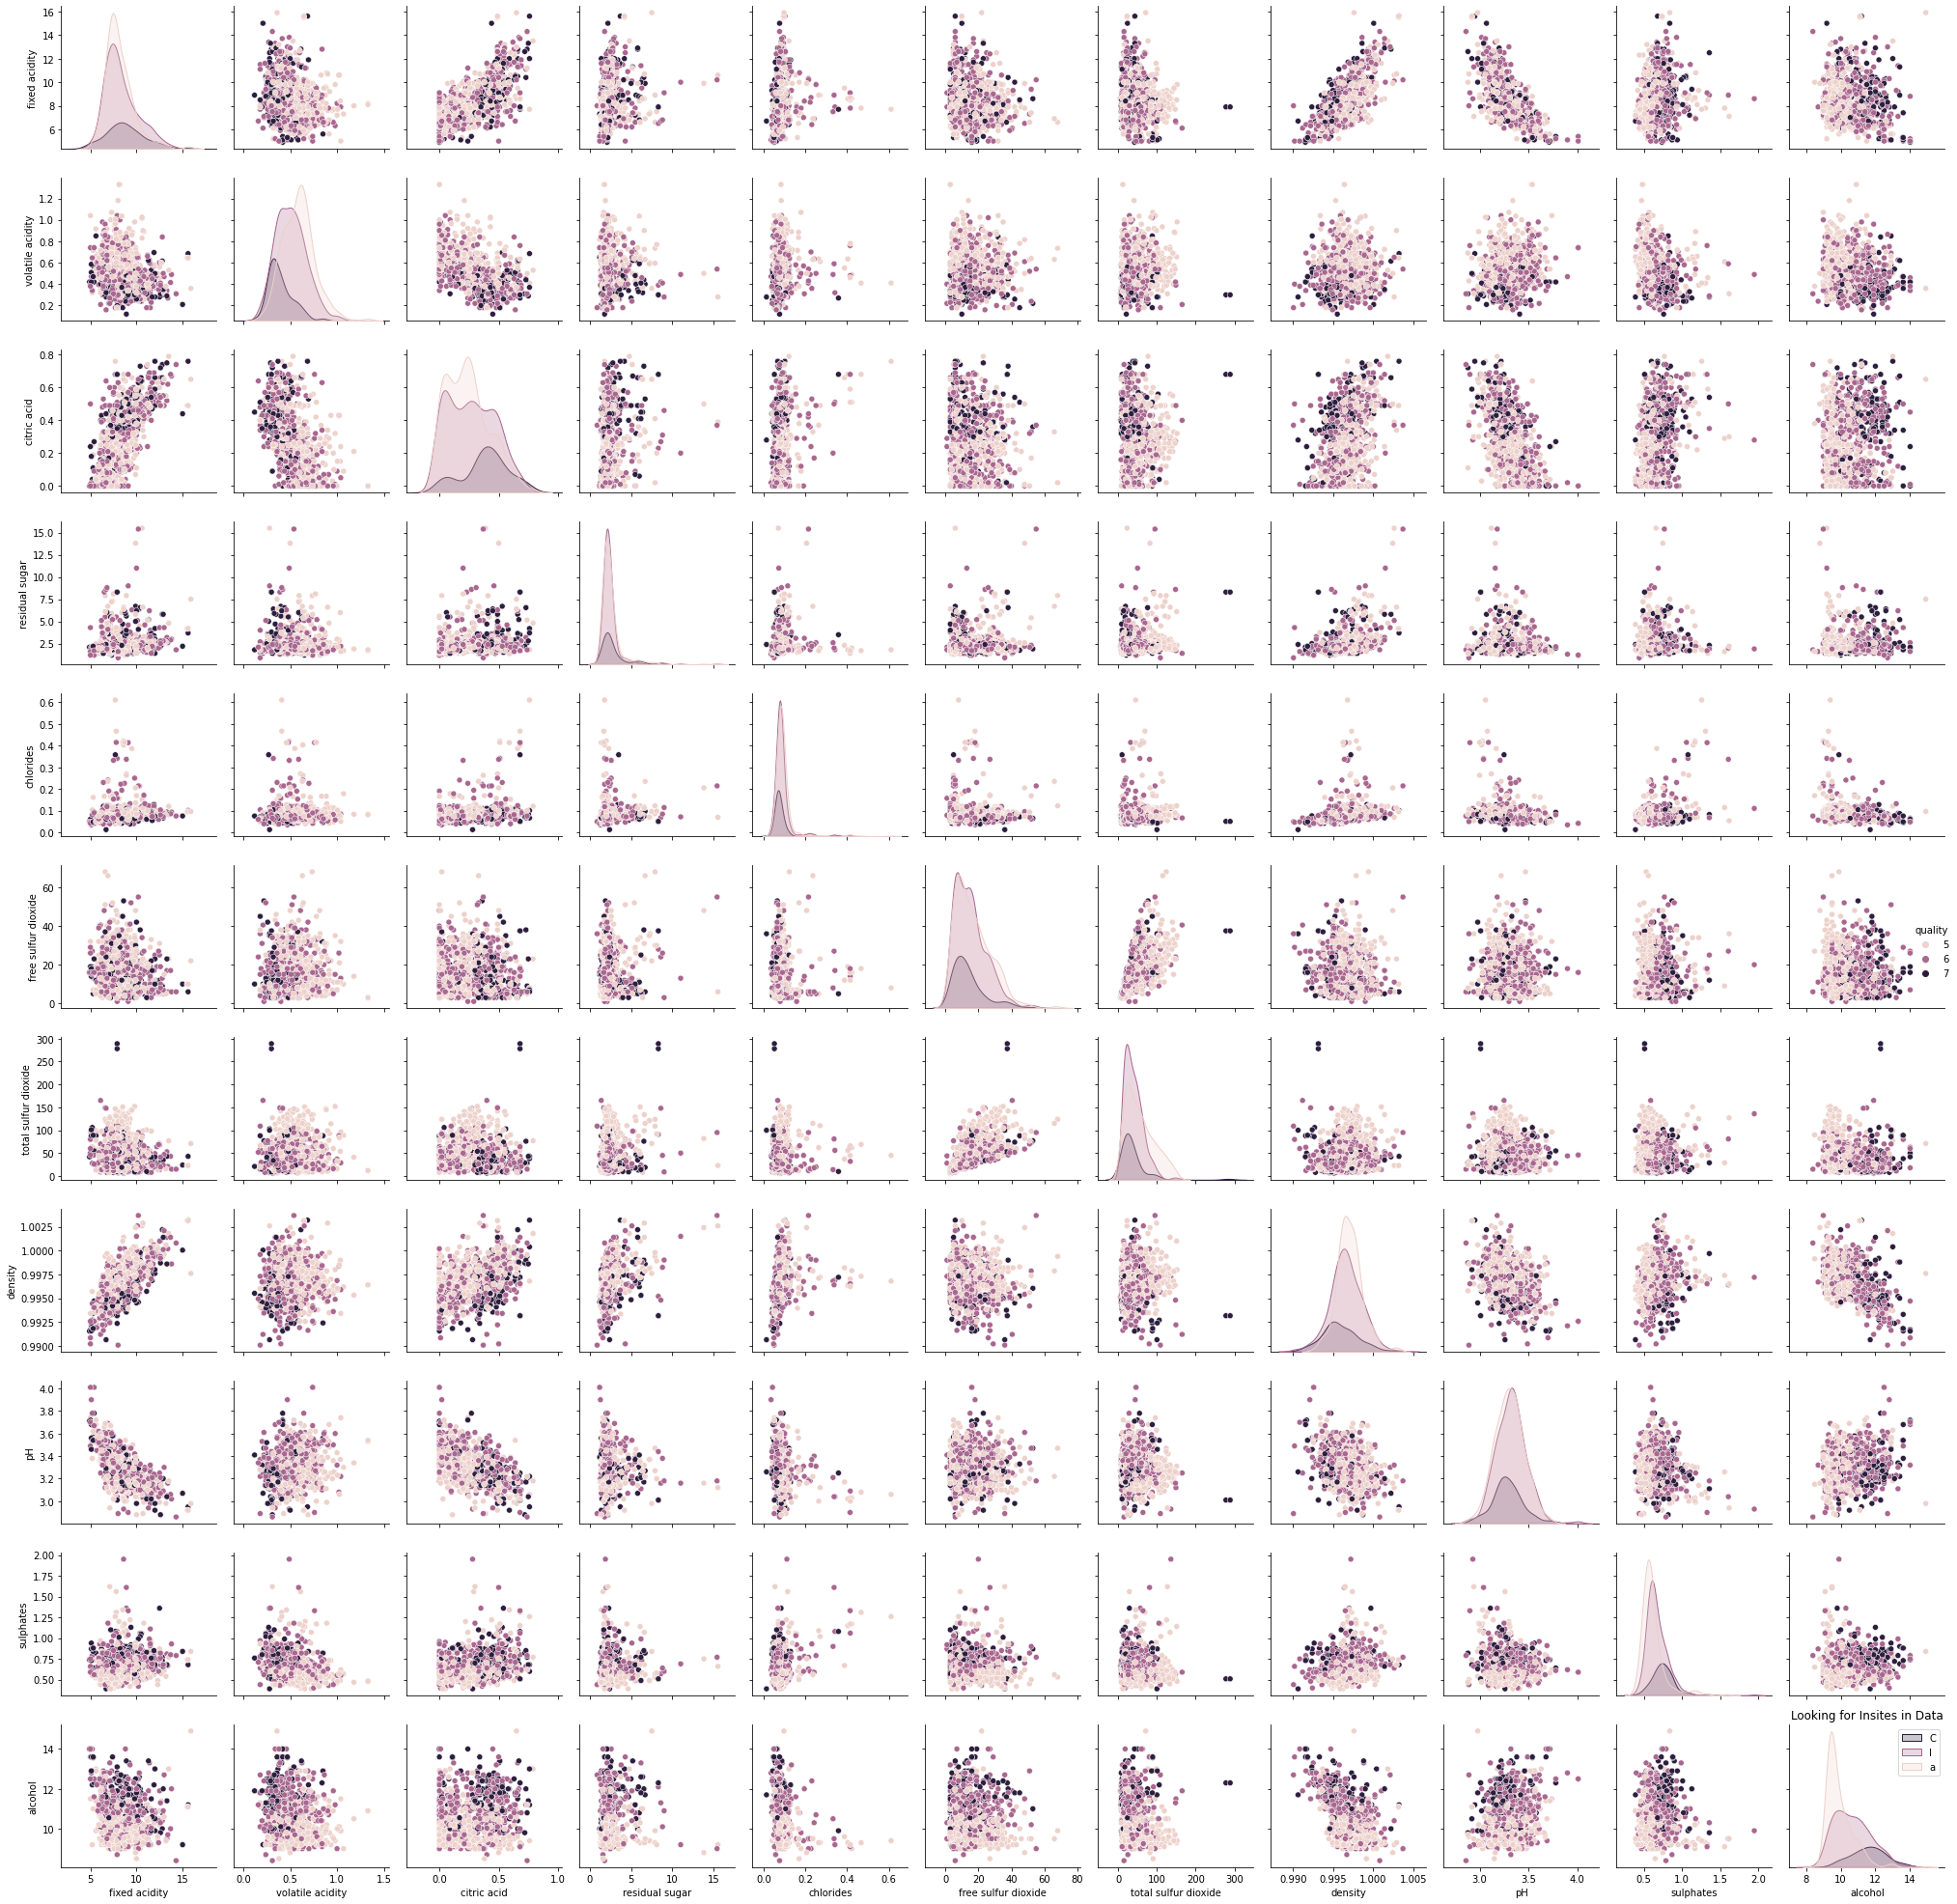

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="quality")
plt.title("Looking for Insites in Data")
plt.legend("Class")
plt.tight_layout()
plt.plot()

Observation, Looks like all features are important.

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

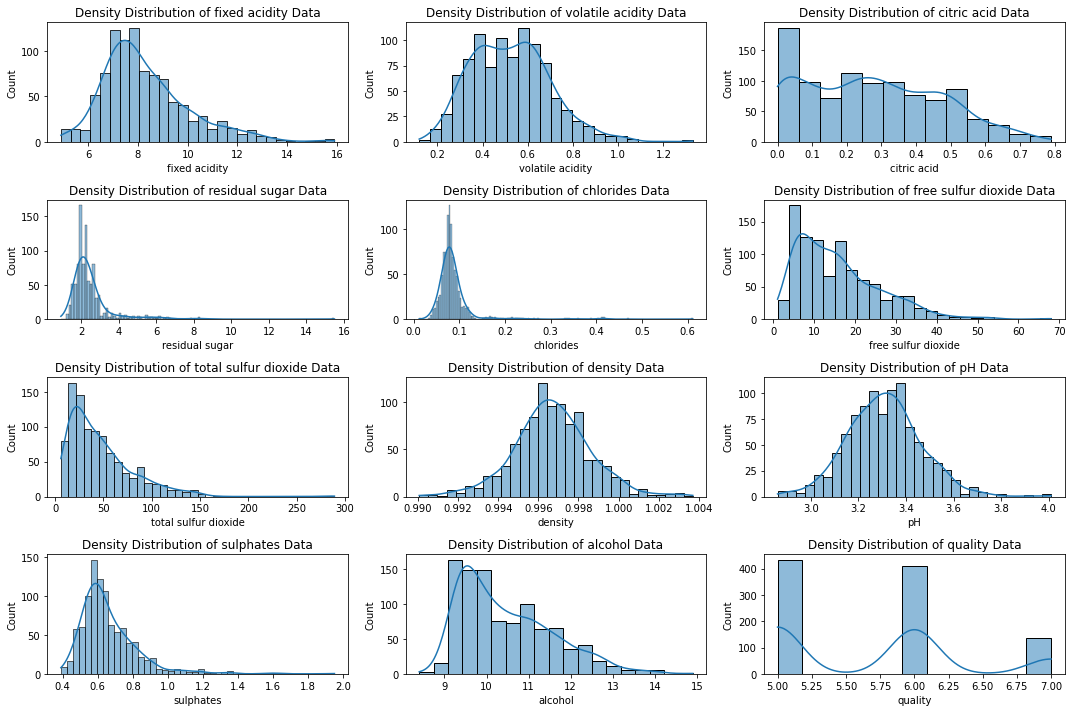

In [21]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Density Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

Normalize the data

In [19]:

# Select numerical variables
data_X = data.drop("quality", axis=1)
# data_X = data_X.drop("Id", axis=1)
numeric = data_X.select_dtypes(exclude=object).columns
#numeric.remove('quality')
print(type(numeric))
for col in numeric:
    data_X[col] = StandardScaler().fit_transform(data_X[[col]])

data = data_X.join(data['quality'])


<class 'pandas.core.indexes.base.Index'>


In [20]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.519338          0.992767    -1.403588       -0.471886  -0.234354   
1      -0.289461          2.017997    -1.403588        0.059078   0.242187   
2      -0.289461          1.334510    -1.197651       -0.168478   0.112221   
3       1.664501         -1.399438     1.479526       -0.471886  -0.256015   
4      -0.519338          0.764938    -1.403588       -0.547738  -0.256015   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.463861             -0.380205  0.575815  1.299106  -0.605634   
1             0.911515              0.611462  0.054935 -0.699605   0.135125   
2            -0.070896              0.220805  0.159111 -0.312758  -0.050065   
3             0.125586              0.401109  0.679992 -0.957503  -0.482174   
4            -0.267378             -0.199902  0.575815  1.299106  -0.605634   

    alcohol  quality  
0 -0.969962        5  
1 -0.605173        5  
2 -0.605173        5  
3 -0.605173        6  
4 -0.969962        5

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

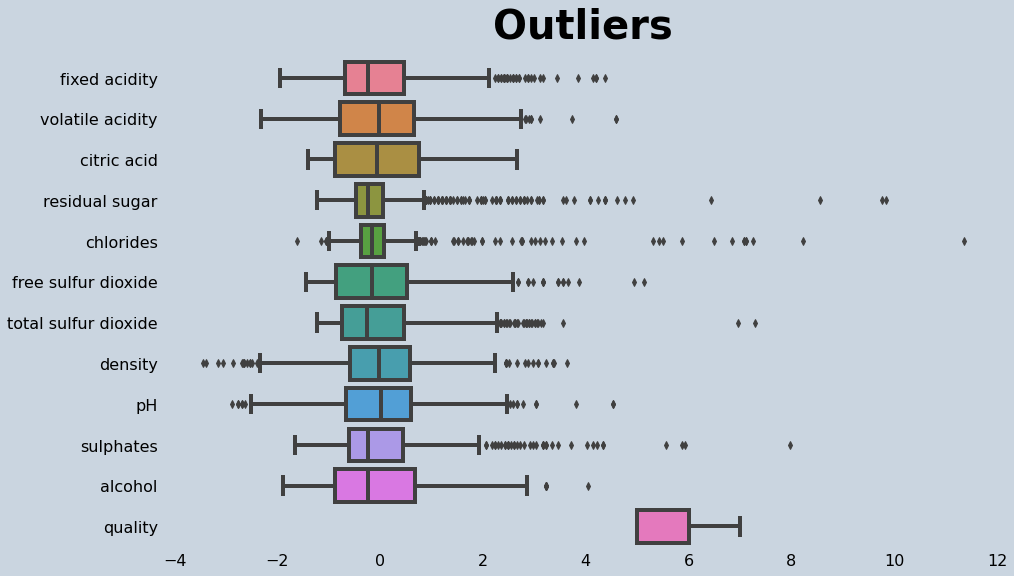

In [21]:
fig, ax = plt.subplots(figsize =(15,9))
ax.patch.set_facecolor('#CAD5E0')
fig.patch.set_facecolor('#CAD5E0')

sns.boxplot(data = data, ax=ax, palette='husl', orient="h", linewidth=4);

# Colors
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
ax.grid(False)

# Change color axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Title
ax.set_title('Outliers', fontsize=40, fontweight="bold", pad=20);

<h3> pH </h3>

In [22]:
# Dealing with the outliers (Pregnancies)
q1 = data['pH'].quantile(0.25)
q3 = data['pH'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['pH'] >= Upper_tail) | (data['pH'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on pH:')
u.value_counts(u['quality'])

Outliers on pH:


quality
6    8
5    4
7    4
dtype: int64

Checked all the outliers, we can not update any of them with median value or drop any outliers

In [23]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.519338          0.992767    -1.403588       -0.471886  -0.234354   
1      -0.289461          2.017997    -1.403588        0.059078   0.242187   
2      -0.289461          1.334510    -1.197651       -0.168478   0.112221   
3       1.664501         -1.399438     1.479526       -0.471886  -0.256015   
4      -0.519338          0.764938    -1.403588       -0.547738  -0.256015   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.463861             -0.380205  0.575815  1.299106  -0.605634   
1             0.911515              0.611462  0.054935 -0.699605   0.135125   
2            -0.070896              0.220805  0.159111 -0.312758  -0.050065   
3             0.125586              0.401109  0.679992 -0.957503  -0.482174   
4            -0.267378             -0.199902  0.575815  1.299106  -0.605634   

    alcohol  quality  
0 -0.969962        5  
1 -0.605173        5  
2 -0.605173        5  
3 -0.605173        6  
4 -0.969962        5

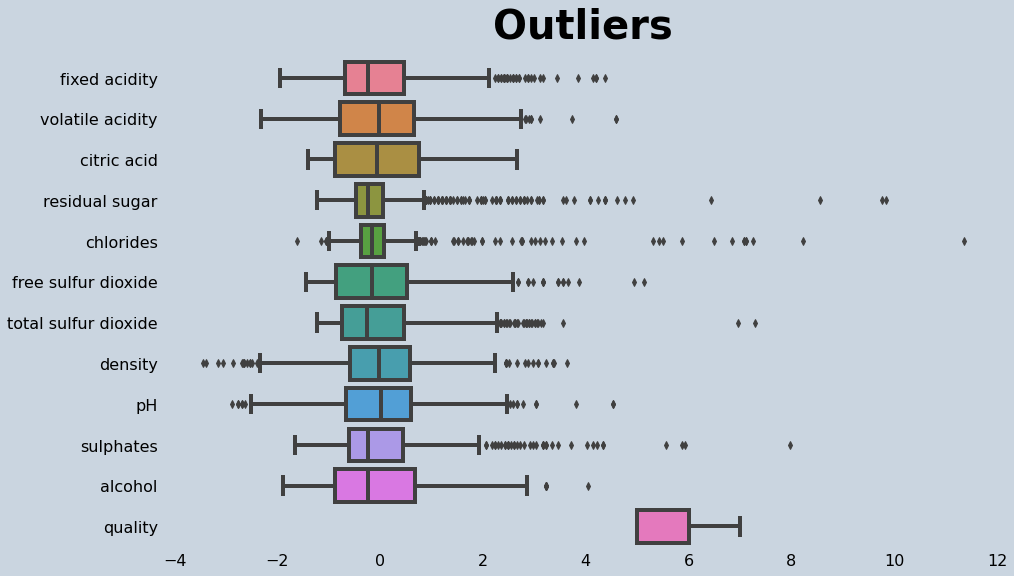

In [24]:
fig, ax = plt.subplots(figsize =(15,9))
ax.patch.set_facecolor('#CAD5E0')
fig.patch.set_facecolor('#CAD5E0')

sns.boxplot(data = data, ax=ax, palette='husl', orient="h", linewidth=4);

# Colors
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
ax.grid(False)

# Change color axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Title
ax.set_title('Outliers', fontsize=40, fontweight="bold", pad=20);

<h1>Data Preprocessing</h1>
<ul>
    <li> Null Values</li>
    <li><ul>Feature Scaling<li>Normalize</li><li>Standardize</li></ul></li>
    <li><ul>
        Handling Categorical Variables
        <li> For Tree based Learning Label encoder </li>
        <li> For Non Tree based Learning One hot encoding </li>
        </ul>
    </li>
</ul>

<h3>Null Value Check</h3>

In [25]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
#Duplicate Data check
data.duplicated().value_counts()

False    979
dtype: int64

In [27]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [28]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.519338          0.992767    -1.403588       -0.471886  -0.234354   
1      -0.289461          2.017997    -1.403588        0.059078   0.242187   
2      -0.289461          1.334510    -1.197651       -0.168478   0.112221   
3       1.664501         -1.399438     1.479526       -0.471886  -0.256015   
4      -0.519338          0.764938    -1.403588       -0.547738  -0.256015   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.463861             -0.380205  0.575815  1.299106  -0.605634   
1             0.911515              0.611462  0.054935 -0.699605   0.135125   
2            -0.070896              0.220805  0.159111 -0.312758  -0.050065   
3             0.125586              0.401109  0.679992 -0.957503  -0.482174   
4            -0.267378             -0.199902  0.575815  1.299106  -0.605634   

    alcohol  quality  
0 -0.969962        5  
1 -0.605173        5  
2 -0.605173        5  
3 -0.605173        6  
4 -0.969962        5

<h1>Split the Data</h1>

In [29]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

print("Splitting StratifiedShuffleSplit into train/test")

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.3, random_state=33)
for train_ind, test_ind in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_ind]
    strat_test_set = data.loc[test_ind]
    
train_set = strat_train_set
test_set = strat_test_set

y_train = train_set[["quality"]]
X_train = train_set.drop("quality", axis=1)
y_test = test_set[["quality"]]
X_test = test_set.drop("quality", axis=1)

y = data[["quality"]]
X = data.drop("quality", axis=1)


print("Setting up global variables")
classifier_accuracy = np.zeros(5)
time_train = np.zeros(5)
time_infer = np.zeros(5)
#print(X[:10])

Splitting StratifiedShuffleSplit into train/test
Setting up global variables


<h1> Models & evaluation </h1>

In [30]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("f1_Micro score of the Model: \n{}".format(f1_score(y_test, mod_pred, average='micro')))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

<h1>Decession Tree </h1>

<p>To prevent overfitting for Decission Tree one way is to control the maximum depth of the tree as a hyper-parameter. We use cross-validation over a range of hyper-parameter values to find the best value for the maximum depth of the tree using the validation_curve and GridSearchCV functions.

The second hyper-parameter that is often important for overfitting is a minimal cost-complexity pruning (CCP), where the regularization parameter  𝛼  allows us to prune the tree after it has been trained. Higher values of  𝛼  leads to more nodes being pruned out from the tree.

For the maximum depth of the tree, we see that the training score in the validation curve saturates at  1  as the model starts to overfit for higher values of max depth.

For the CCP  𝛼 , the training score goes down with increasing  𝛼  as more of the tree is pruned out.</p>

In [47]:
clf_dt = tree.DecisionTreeClassifier(random_state=33, criterion='gini', max_depth=None)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
dt_accuracy = f1_score(y_test, y_pred, average='micro')
#dt_accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')

print('F1 score of decision tree without any hyperparameter tuning: %.2f%%' % (dt_accuracy*100))

F1 score of decision tree without any hyperparameter tuning: 55.78%


<h3>Random Forest</h3>

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf_dt_r = RandomForestClassifier(n_estimators=200,criterion="gini", random_state=33)
clf_dt_r.fit(X_train, y_train)
y_pred = clf_dt_r.predict(X_test)
dt_accuracy = f1_score(y_test, y_pred, average='micro')
print('F1 score of Random Forest: %.2f%%' % (dt_accuracy*100))

F1 score of Random Forest: 64.29%


<h1> Decession Tree, Validation and Loss curves </h1>
<p> For a single tree we would like to tune the hyper paramters</p>

<p>changing cross validation CV, gives different results ?</p>

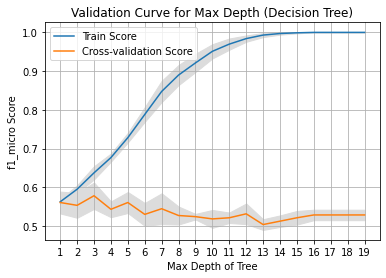

In [61]:
#classifier_decision_tree = tree.DecisionTreeClassifier(random_state=15)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_range=np.arange(1,20), param_name='max_depth', scoring='f1_micro', cv=5)
param_range=np.arange(1,20)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,20), train_mean, label='Train Score')
plt.plot(np.arange(1,20), test_mean, label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
    
plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("f1_micro Score")
plt.xticks(np.arange(1,20))
plt.grid()
plt.savefig('../images/wq/wq_dt_vc_md.png')
plt.show()

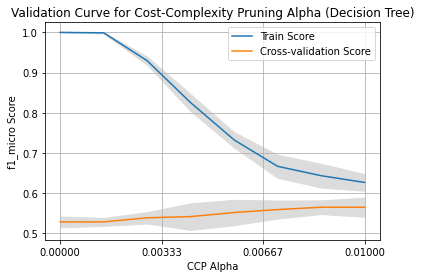

In [62]:
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_range=np.linspace(0,0.01,8), param_name='ccp_alpha', scoring='f1_micro', cv=5)

param_range=np.linspace(0,0.01,8)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0,0.01,8), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0,0.01,8), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
    
    
plt.legend()
plt.title("Validation Curve for Cost-Complexity Pruning Alpha (Decision Tree)")
plt.xlabel("CCP Alpha")
plt.ylabel("f1_micro Score")
plt.xticks(np.linspace(0,0.01,4))
plt.grid()
plt.savefig('../images/wq/wq_dt_vc_ccp.png')
plt.show()

In [54]:
param_grid = {'max_depth': np.arange(1,20), 'ccp_alpha': np.linspace(0,0.01,8)}
#param_grid = {'max_depth': np.arange(1,36)}
clf_dt_g = GridSearchCV(clf_dt, param_grid=param_grid, scoring='f1_micro', cv=5)
start_time = time.time()
clf_dt_g.fit(X_train, y_train)
end_time = time.time()
time_train[0] = end_time-start_time
print("Best params for decision tree:",clf_dt_g.best_params_)

start_time = time.time()
classifier_accuracy[0] = f1_score(y_test, clf_dt_g.predict(X_test), average='micro')
end_time = time.time()
time_infer[0] = end_time-start_time
print("f1_micro score for best decision tree:", classifier_accuracy[0])
print('Completed training in %f seconds' % time_train[0])
print('Inference time on test data: %f seconds' % time_infer[0])

Best params for decision tree: {'ccp_alpha': 0.0, 'max_depth': 3}
f1_micro score for best decision tree: 0.6156462585034014
Completed training in 4.661038 seconds
Inference time on test data: 0.002921 seconds


In [55]:
confusion_matrix(y_test, clf_dt_g.predict(X_test))

array([[81, 48,  1],
       [14, 89, 20],
       [ 4, 26, 11]], dtype=int64)

In [56]:
model_evaluation(clf_dt_g, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           5       0.82      0.62      0.71       130
           6       0.55      0.72      0.62       123
           7       0.34      0.27      0.30        41

    accuracy                           0.62       294
   macro avg       0.57      0.54      0.54       294
weighted avg       0.64      0.62      0.62       294

Confusion Matrix of the given Model: 
 [[81 48  1]
 [14 89 20]
 [ 4 26 11]]
f1_Micro score of the Model: 
0.6156462585034014
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'ccp_alpha': array([0.        , 0.00142857, 0.00285714, 0.00428571, 0.00571429,
       0.00714286, 0.00857143, 0.01      ]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1_micro')

<h3>Learning Curve</h3>

3


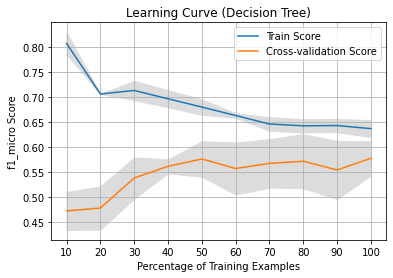

In [63]:
best_clf_dt = tree.DecisionTreeClassifier(random_state=33, max_depth=clf_dt_g.best_params_['max_depth'], ccp_alpha=clf_dt_g.best_params_['ccp_alpha'])
print(clf_dt_g.best_params_['max_depth'])
_, train_scores, test_scores = learning_curve(best_clf_dt, X_train, y_train, scoring='f1_micro', train_sizes=np.linspace(0.1,1.0,10), cv=5)

param_range=np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
    
    
plt.legend()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("f1_micro Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/wq/wq_dt_lc.png')
plt.show()

[Text(0.5, 0.875, 'X[10] <= 0.056\ngini = 0.61\nsamples = 979\nvalue = [433, 409, 137]'),
 Text(0.25, 0.625, 'X[9] <= -0.451\ngini = 0.502\nsamples = 594\nvalue = [364, 207, 23]'),
 Text(0.125, 0.375, 'X[10] <= -0.651\ngini = 0.361\nsamples = 259\nvalue = [199, 57, 3]'),
 Text(0.0625, 0.125, 'gini = 0.239\nsamples = 153\nvalue = [132, 20, 1]'),
 Text(0.1875, 0.125, 'gini = 0.478\nsamples = 106\nvalue = [67, 37, 2]'),
 Text(0.375, 0.375, 'X[6] <= 1.092\ngini = 0.553\nsamples = 335\nvalue = [165, 150, 20]'),
 Text(0.3125, 0.125, 'gini = 0.557\nsamples = 280\nvalue = [118, 143, 19]'),
 Text(0.4375, 0.125, 'gini = 0.253\nsamples = 55\nvalue = [47, 7, 1]'),
 Text(0.75, 0.625, 'X[1] <= -0.574\ngini = 0.605\nsamples = 385\nvalue = [69, 202, 114]'),
 Text(0.625, 0.375, 'X[6] <= -0.095\ngini = 0.586\nsamples = 174\nvalue = [18, 74, 82]'),
 Text(0.5625, 0.125, 'gini = 0.553\nsamples = 125\nvalue = [10, 46, 69]'),
 Text(0.6875, 0.125, 'gini = 0.576\nsamples = 49\nvalue = [8, 28, 13]'),
 Text(0.87

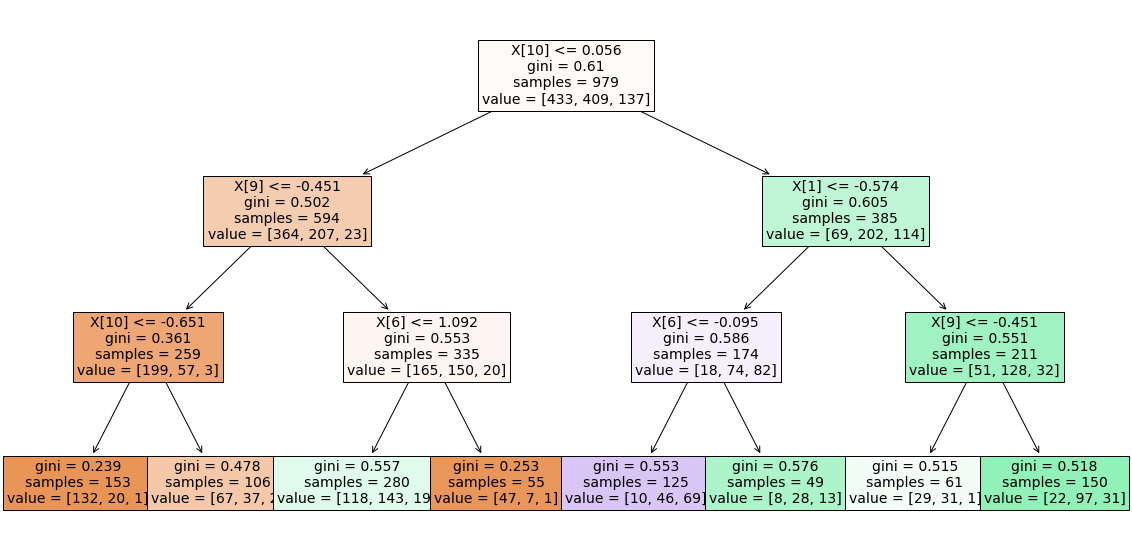

In [42]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=clf_dt_g.best_params_['max_depth'], ccp_alpha=clf_dt_g.best_params_['ccp_alpha'])
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

The learning curve shows a large gap between the training and cross-validation scores. This means that there is high variance in the model, and this implies that we need more data, or we need to choose a model with fewer features (less complex model) if possible.

<h1>Neural Network</h1>

In [31]:
clf_nn = MLPClassifier(hidden_layer_sizes=(4, 4), random_state=33, max_iter=1000)
clf_nn.fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)
nn_accuracy = f1_score(y_test, y_pred, average='micro')
print('f1 score of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

f1 score of neural network without hyperparameter tuning is 66.67%


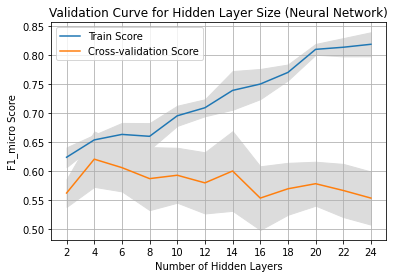

In [32]:
classifier_neural_network = MLPClassifier(random_state=33, max_iter=2000)
train_scores, test_scores = validation_curve(classifier_neural_network, X_train, y_train, param_name="hidden_layer_sizes", param_range=np.arange(2,25,2), scoring='f1_micro', cv=5)

param_range=np.arange(2,25,2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure()
plt.plot(np.arange(2,25,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(2,25,2), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Hidden Layer Size (Neural Network)")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("F1_micro Score")
plt.grid()
plt.xticks(np.arange(2,25,2))
plt.savefig('../images/wq/wq_nn_vc_hl.png')
plt.show()

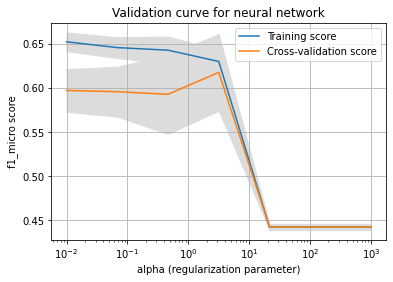

In [33]:
# Regularization parameter
alpha_range = np.logspace(-2, 3, 7)
train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="alpha", param_range=alpha_range, scoring='f1_micro', cv=5)

param_range=np.logspace(-2, 3, 7)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Validation curve for neural network')
plt.xlabel('alpha (regularization parameter)')
plt.ylabel("f1_micro score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/wq/wq_nn_vc_alpha.png')
plt.show()



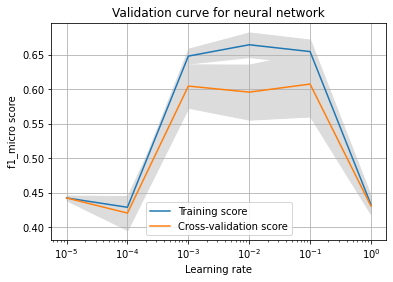

In [67]:
# Learning rate
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, scoring='f1_micro', cv=5)

param_range=np.logspace(-5, 0, 6)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Validation curve for neural network')
plt.xlabel('Learning rate')
plt.ylabel("f1_micro score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/wq/wq_nn_vc_lri.png')
plt.show()

In [34]:

# Define grid for grid search after observing validation curves
param_grid = {'learning_rate_init': np.logspace(-3, -1, 3), 'hidden_layer_sizes': [4]}
clf_nn_g = GridSearchCV(clf_nn, param_grid=param_grid, scoring='f1_micro', cv=5)

t0 = time.time()
clf_nn_g.fit(X_train, y_train)
t1 = time.time()
time_train[1] = t1 - t0
print('Completed training in %f seconds' % time_train[1])
best_clf_nn = clf_nn_g
best_params = clf_nn_g.best_params_
print("Best parameters set found on development set:")
print(best_params)

start_time = time.time()
classifier_accuracy[1] = f1_score(y_test, clf_nn_g.predict(X_test), average='micro')
end_time = time.time()
time_infer[1] = end_time-start_time
print("f1_micro score for best Neural Network:", classifier_accuracy[1])
print('Completed training in %f seconds' % time_train[1])

Completed training in 4.454999 seconds
Best parameters set found on development set:
{'hidden_layer_sizes': 4, 'learning_rate_init': 0.001}
f1_micro score for best Neural Network: 0.6530612244897959
Completed training in 4.454999 seconds


In [35]:
confusion_matrix(y_test, best_clf_nn.predict(X_test))

array([[95, 33,  2],
       [24, 78, 21],
       [ 2, 20, 19]], dtype=int64)

In [36]:
model_evaluation(best_clf_nn, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           5       0.79      0.73      0.76       130
           6       0.60      0.63      0.61       123
           7       0.45      0.46      0.46        41

    accuracy                           0.65       294
   macro avg       0.61      0.61      0.61       294
weighted avg       0.66      0.65      0.66       294

Confusion Matrix of the given Model: 
 [[95 33  2]
 [24 78 21]
 [ 2 20 19]]
f1_Micro score of the Model: 
0.6530612244897959
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000,
                                     random_state=33),
             param_grid={'hidden_layer_sizes': [4],
                         'learning_rate_init': array([0.001, 0.01 , 0.1  ])},
             scoring='f1_micro')

<h3>Learning Curve</h3>

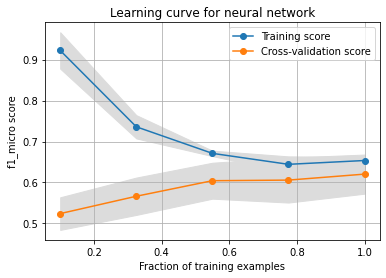

In [37]:
train_sizes = np.linspace(0.1, 1.0, 5)
clf_nn_l = MLPClassifier(random_state=33, max_iter=2000, hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], learning_rate_init=best_clf_nn.best_params_['learning_rate_init'])
_, train_scores, test_scores = learning_curve(clf_nn_l, X_train, y_train, train_sizes=train_sizes, scoring='f1_micro', cv=5)

param_range=np.linspace(0.1, 1.0, 5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title('Learning curve for neural network')
plt.xlabel('Fraction of training examples')
plt.ylabel("f1_micro score")
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/wq/wq_nn_lc.png')
plt.show()

In [50]:
classifier_neural_network = MLPClassifier(random_state=33, max_iter=1, learning_rate_init=best_clf_nn.best_params_['learning_rate_init'], hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], warm_start=True)
epochs = 300
loss_training = np.zeros(epochs)
score_training = np.zeros(epochs)
score_validation = np.zeros(epochs)

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=15)
for epoch in range(epochs):
    classifier_neural_network.fit(X_train_train, y_train_train)
    
    score_training[epoch] = f1_score(y_train_train, classifier_neural_network.predict(X_train_train), average='micro')
    score_validation[epoch] = f1_score(y_train_val, classifier_neural_network.predict(X_train_val), average='micro')
    
    loss_training[epoch] = classifier_neural_network.loss_
    
score_test = f1_score(y_test, classifier_neural_network.predict(X_test), average='micro')
print("f1_micro Score:", score_test)

f1_micro Score: 0.6326530612244898


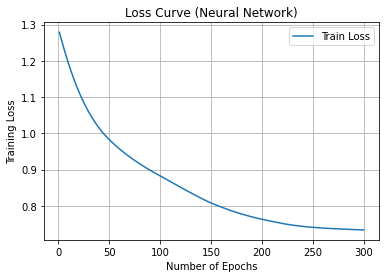

In [51]:
plt.figure()
plt.plot(np.arange(epochs)+1, loss_training, label='Train Loss')
plt.legend()
plt.title("Loss Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.savefig('../images/wq/wq_nn_loss_curve.png')
plt.show()

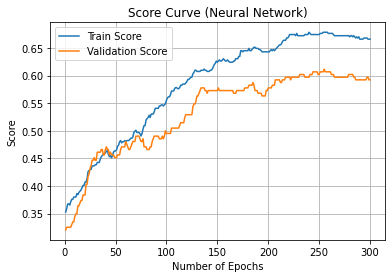

In [52]:
plt.figure()
plt.plot(np.arange(epochs)+1, score_training, label='Train Score')
plt.plot(np.arange(epochs)+1, score_validation, label='Validation Score')
plt.legend()
plt.title("Score Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.grid()
plt.savefig('../images/wq/wq_nn_score_curve.png')
plt.show()

In [53]:

mlp = MLPClassifier(random_state=15, max_iter=1, learning_rate_init=best_clf_nn.best_params_['learning_rate_init'], hidden_layer_sizes=best_clf_nn.best_params_['hidden_layer_sizes'], warm_start=True)
epochs = 300

training_mse = []
validation_mse = []
for epoch in range(epochs):
    mlp.fit(X_train, y_train) 
    Y_pred = mlp.predict(X_train)
    curr_train_score = mean_squared_error(y_train, Y_pred) # training performances
    Y_pred = mlp.predict(X_test) 
    curr_valid_score = mean_squared_error(y_test, Y_pred) # validation performances
    training_mse.append(curr_train_score)                  # list of training perf to plot
    validation_mse.append(curr_valid_score)  

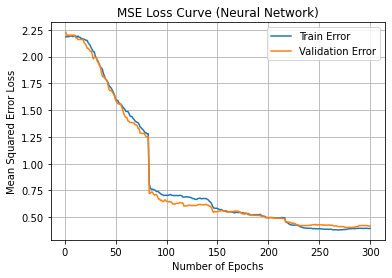

In [54]:
plt.figure()
plt.plot(np.arange(epochs)+1, training_mse, label='Train Error')
plt.plot(np.arange(epochs)+1, validation_mse, label='Validation Error')
plt.legend()
plt.title("MSE Loss Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.grid()
plt.savefig('../images/wq/wq_nn_loss_curve_2.png')
plt.show()

<h3>Boosting</h3>

The final classifier that we show here is the boosting method. We use the AdaBoost classifier with a single leaf decision tree as the weak learner. The hyper-parameters chosen for this classifier are the number of weak learners and the learning rate.

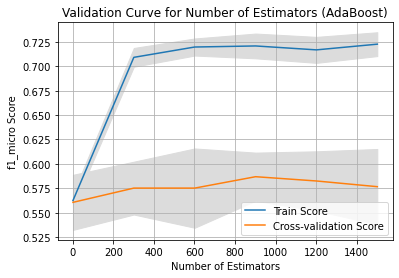

In [72]:
classifier_adaboost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1), random_state=33)
train_scores, test_scores = validation_curve(classifier_adaboost, X_train, y_train, param_name="n_estimators", param_range=np.arange(1,1700,300), scoring='f1_micro', cv=5)

param_range=np.arange(1,1700,300)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,1700,300), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,1700,300), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Number of Estimators (AdaBoost)")
plt.xlabel("Number of Estimators")
plt.ylabel("f1_micro Score")
plt.grid()
plt.savefig('../images/wq/wq_ada_vc_n_est.png')
plt.show()

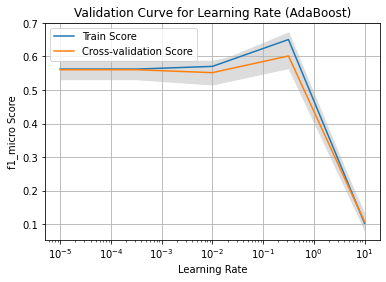

In [73]:
train_scores, test_scores = validation_curve(classifier_adaboost, X_train, y_train, param_name="learning_rate", param_range=np.logspace(-5,1,5), scoring='f1_micro', cv=5)

param_range=np.logspace(-5,1,5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(np.logspace(-5,1,5), np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(np.logspace(-5,1,5), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Learning Rate (AdaBoost)")
plt.xlabel("Learning Rate")
plt.ylabel("f1_micro Score")
plt.grid()
plt.savefig('../images/wq/wq_ada_vc_lr.png')
plt.show()

In [74]:
param_grid = {'learning_rate': np.logspace(-3,0,5), 'n_estimators': np.arange(500,1000,200)}
classifier_adaboost_best = GridSearchCV(classifier_adaboost, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_adaboost_best.fit(X_train, y_train)
end_time = time.time()
time_train[2] = end_time-start_time
print("Best params for AdaBoost:",classifier_adaboost_best.best_params_)

start_time = time.time()
classifier_accuracy[2] = f1_score(y_test, classifier_adaboost_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[2] = end_time-start_time
print("f1_micro score for best AdaBoost:", classifier_accuracy[2])

Best params for AdaBoost: {'learning_rate': 0.03162277660168379, 'n_estimators': 900}
f1_micro score for best AdaBoost: 0.6326530612244898


In [59]:
confusion_matrix(y_test, classifier_adaboost_best.predict(X_test))

array([[86, 43,  1],
       [22, 85, 16],
       [ 0, 26, 15]], dtype=int64)

In [60]:
model_evaluation(classifier_adaboost_best, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           5       0.80      0.66      0.72       130
           6       0.55      0.69      0.61       123
           7       0.47      0.37      0.41        41

    accuracy                           0.63       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.65      0.63      0.63       294

Confusion Matrix of the given Model: 
 [[86 43  1]
 [22 85 16]
 [ 0 26 15]]
f1_Micro score of the Model: 
0.6326530612244898
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=33),
             param_grid={'learning_rate': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                         'n_estimators': array([500, 700, 900])},
             scoring='f1_micro')

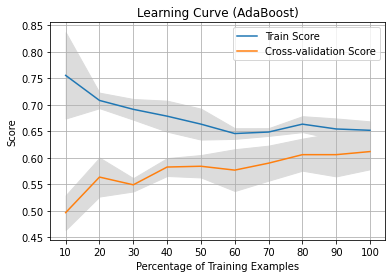

In [75]:
classifier_adaboost_learning_curve = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1), random_state=33, n_estimators=classifier_adaboost_best.best_params_['n_estimators'], learning_rate=classifier_adaboost_best.best_params_['learning_rate'])
_, train_scores, test_scores = learning_curve(classifier_adaboost_learning_curve, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='f1_micro', cv=5)

param_range=np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Learning Curve (AdaBoost)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/wq/wq_ada_lc.png')
plt.show()

<h3>K-Nearest Neighbor</h3>

Next, we look at the $k$-Nearest Neighbor classifier ($k$-NN). For the $k$-NN classifier, we choose the number of neighbors and the power of the distance metric as the hyper-parameters, and plot the validation curves. As expected, with more number of neighbors, the bias in the model keeps increasing and both the training and cross-validation scores keep falling after a certain value on $k$.

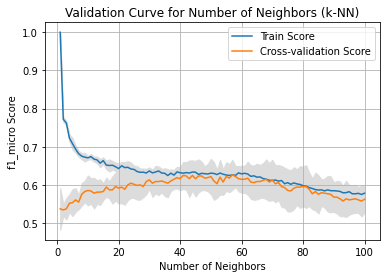

In [76]:
classifier_knn = KNeighborsClassifier()
train_scores, test_scores = validation_curve(classifier_knn, X_train, y_train, param_range=np.arange(1,101), param_name='n_neighbors', scoring='f1_micro', cv=5)

param_range= np.arange(1,101)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,101), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,101), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Number of Neighbors (k-NN)")
plt.xlabel("Number of Neighbors")
plt.ylabel("f1_micro Score")
plt.grid()
plt.savefig('../images/wq/wq_knn_vc_n_nei.png')
plt.show()

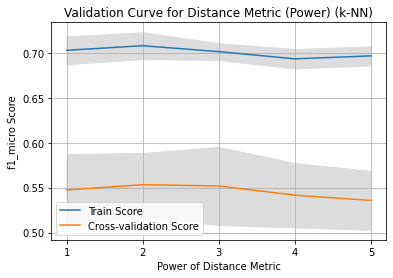

In [77]:
train_scores, test_scores = validation_curve(classifier_knn, X_train, y_train, param_name="p", param_range=np.arange(1,6), scoring='f1_micro', cv=5)

param_range= np.arange(1,6)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(1,6), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(1,6), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for Distance Metric (Power) (k-NN)")
plt.xlabel("Power of Distance Metric")
plt.ylabel("f1_micro Score")
plt.grid()
plt.xticks(np.arange(1,6))
plt.savefig('../images/wq/wq_knn_vc_n_p.png')
plt.show()

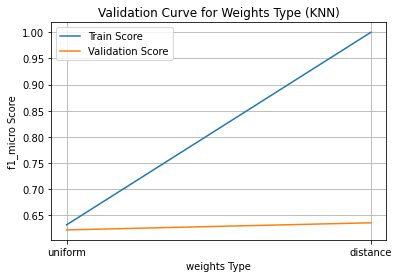

In [64]:
train_scores = np.zeros((2,1))
test_scores = np.zeros((2,1))

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=15)

classifier_knn = KNeighborsClassifier(n_neighbors=46, weights='uniform')
classifier_knn.fit(X_train, y_train)
train_scores[0] = f1_score(y_train, classifier_knn.predict(X_train), average='micro')
test_scores[0] = f1_score(y_test, classifier_knn.predict(X_test), average='micro')

classifier_knn = KNeighborsClassifier(n_neighbors=46, weights='distance')
classifier_knn.fit(X_train, y_train)
train_scores[1] = f1_score(y_train, classifier_knn.predict(X_train), average='micro')
test_scores[1] = f1_score(y_test, classifier_knn.predict(X_test), average='micro')

plt.figure()
plt.plot(np.arange(0,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(0,2), np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Weights Type (KNN)")
plt.xlabel("weights Type")
plt.ylabel("f1_micro Score")
plt.grid()
plt.xticks(np.arange(2),['uniform','distance'])
#plt.savefig('../images/wq/wq_svm_vc_kernel.png')
plt.show()

In [78]:
param_grid = {'n_neighbors': np.arange(1,75), 'p':np.arange(1,6)}
classifier_knn_best = GridSearchCV(classifier_knn, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_knn_best.fit(X_train, y_train)
end_time = time.time()
time_train[3] = end_time-start_time
print("Best params for k-NN:",classifier_knn_best.best_params_)

start_time = time.time()
classifier_accuracy[3] = f1_score(y_test, classifier_knn_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[3] = end_time-start_time
print("f1_micro score for best k-NN:", classifier_accuracy[3])

Best params for k-NN: {'n_neighbors': 57, 'p': 2}
f1_micro score for best k-NN: 0.6224489795918368


In [66]:
confusion_matrix(y_test, classifier_knn_best.predict(X_test))

array([[92, 37,  1],
       [30, 74, 19],
       [ 2, 24, 15]], dtype=int64)

In [67]:
model_evaluation(classifier_knn_best, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           5       0.74      0.71      0.72       130
           6       0.55      0.60      0.57       123
           7       0.43      0.37      0.39        41

    accuracy                           0.62       294
   macro avg       0.57      0.56      0.56       294
weighted avg       0.62      0.62      0.62       294

Confusion Matrix of the given Model: 
 [[92 37  1]
 [30 74 19]
 [ 2 24 15]]
f1_Micro score of the Model: 
0.6156462585034014
Evaluation process is done ...
***********************************************


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=46, weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74]),
                         'p': array([1, 2, 3, 4, 5])},
             scoring='f1_micro')

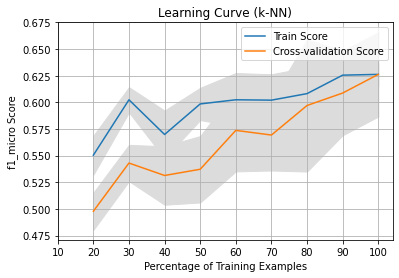

In [79]:
classifier_knn_learning = KNeighborsClassifier(n_neighbors=classifier_knn_best.best_params_['n_neighbors'], p=classifier_knn_best.best_params_['p'])
_, train_scores, test_scores = learning_curve(classifier_knn_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='f1_micro', cv=5)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")


plt.legend()
plt.title("Learning Curve (k-NN)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("f1_micro Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/wq/wq_knn_lc.png')
plt.show()

<h3> SVM </h3>

The performance of the SVM classifier is shown next. The validation curves are shown first, with a varying regularizaion parameter $C$ as well as for different types of kernels. In order to plot the validation curve for the different kernels, the training set is further divided to create a validation set.

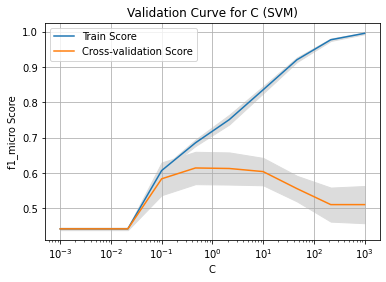

In [80]:
classifier_svm = svm.SVC(random_state=33)
train_scores, test_scores = validation_curve(classifier_svm, X_train, y_train, param_name="C", param_range=np.logspace(-3,3,10), scoring='f1_micro', cv=5)


param_range= np.logspace(-3,3,10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.semilogx(np.logspace(-3,3,10), np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(np.logspace(-3,3,10), np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("f1_micro Score")
plt.grid()
plt.savefig('../images/wq/wq_svm_vc_c.png')
plt.show()

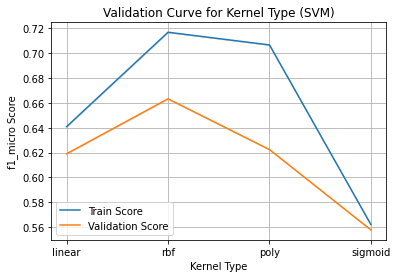

In [82]:
train_scores = np.zeros((4,1))
test_scores = np.zeros((4,1))

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=15)

classifier_svm = svm.SVC(random_state=33, kernel='linear')
classifier_svm.fit(X_train, y_train)
train_scores[0] = f1_score(y_train, classifier_svm.predict(X_train), average='micro')
test_scores[0] = f1_score(y_test, classifier_svm.predict(X_test), average='micro')

classifier_svm = svm.SVC(random_state=33, kernel='rbf')
classifier_svm.fit(X_train, y_train)
train_scores[1] = f1_score(y_train, classifier_svm.predict(X_train), average='micro')
test_scores[1] = f1_score(y_test, classifier_svm.predict(X_test), average='micro')

classifier_svm = svm.SVC(random_state=33, kernel='poly')
classifier_svm.fit(X_train, y_train)
train_scores[2] = f1_score(y_train, classifier_svm.predict(X_train), average='micro')
test_scores[2] = f1_score(y_test, classifier_svm.predict(X_test), average='micro')

classifier_svm = svm.SVC(random_state=33, kernel='sigmoid')
classifier_svm.fit(X_train, y_train)
train_scores[3] = f1_score(y_train, classifier_svm.predict(X_train), average='micro')
test_scores[3] = f1_score(y_test, classifier_svm.predict(X_test), average='micro')

param_range= np.arange(0,4)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.arange(0,4), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(0,4), np.mean(test_scores, axis=1), label='Validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")


plt.legend()
plt.title("Validation Curve for Kernel Type (SVM)")
plt.xlabel("Kernel Type")
plt.ylabel("f1_micro Score")
plt.grid()
plt.xticks(np.arange(4),['linear','rbf','poly','sigmoid'])
plt.savefig('../images/wq/wq_svm_vc_kernel.png')
plt.show()

In [71]:
param_grid = {'C': np.logspace(-1,0,10), 'kernel': ['linear']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[4] = end_time-start_time
print("f1_micro for best SVM:", classifier_accuracy[4])

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'linear'}
f1_micro for best SVM: 0.6190476190476191


In [72]:
param_grid = {'C': np.logspace(-1,0,10), 'kernel': ['rbf']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[4] = end_time-start_time
print("f1_micro for best SVM:", classifier_accuracy[4])

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'rbf'}
f1_micro for best SVM: 0.6632653061224489


In [73]:
param_grid = {'C': np.logspace(-1,0,10), 'kernel': ['poly']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[4] = end_time-start_time
print("f1_micro for best SVM:", classifier_accuracy[4])

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'poly'}
f1_micro for best SVM: 0.6224489795918368


In [74]:
param_grid = {'C': np.logspace(-1,0,10), 'kernel': ['sigmoid']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[4] = end_time-start_time
print("f1_micro for best SVM:", classifier_accuracy[4])

Best params for SVM: {'C': 0.35938136638046275, 'kernel': 'sigmoid'}
f1_micro for best SVM: 0.6326530612244898


In [84]:
param_grid = {'C': np.logspace(-1,0,10), 'kernel': ['rbf']}
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, scoring='f1_micro', cv=5)

start_time = time.time()
classifier_svm_best.fit(X_train, y_train)
end_time = time.time()
time_train[4] = end_time-start_time
print("Best params for SVM:",classifier_svm_best.best_params_)

start_time = time.time()
classifier_accuracy[4] = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')
end_time = time.time()
time_infer[4] = end_time-start_time
print("f1_micro for best SVM:", classifier_accuracy[4])

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'rbf'}
f1_micro for best SVM: 0.6632653061224489


In [76]:
confusion_matrix(y_test, classifier_svm_best.predict(X_test))

array([[100,  27,   3],
       [ 29,  76,  18],
       [  4,  18,  19]], dtype=int64)

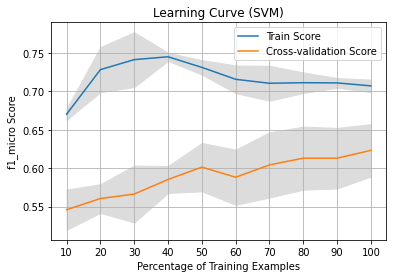

In [85]:
classifier_svm_learning = svm.SVC(random_state=32, C=classifier_svm_best.best_params_['C'], kernel='rbf')
_, train_scores, test_scores = learning_curve(classifier_svm_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='f1_micro', cv=5)

param_range= np.linspace(0.1,1.0,10)*100
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Cross-validation Score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gainsboro")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")


plt.legend()
plt.title("Learning Curve (SVM)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("f1_micro Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('../images/wq/wq_svm_lc.png')
plt.show()

In [78]:
classifier_svm_learning_gamma = svm.SVC(random_state=32, C=classifier_svm_best.best_params_['C'], kernel='rbf', gamma='auto')

classifier_svm_learning_gamma.fit(X_train, y_train)
print("Best params for SVM:",classifier_svm_best.best_params_)


accuracy_gamma = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')

print("f1_micro for best SVM:", accuracy_gamma)

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'rbf'}
f1_micro for best SVM: 0.6632653061224489


In [79]:
classifier_svm_learning_gamma = svm.SVC(random_state=32, C=classifier_svm_best.best_params_['C'], kernel='rbf', gamma='scale')

classifier_svm_learning_gamma.fit(X_train, y_train)
print("Best params for SVM:",classifier_svm_best.best_params_)


accuracy_gamma = f1_score(y_test, classifier_svm_best.predict(X_test), average='micro')

print("f1_micro for best SVM:", accuracy_gamma)

Best params for SVM: {'C': 0.774263682681127, 'kernel': 'rbf'}
f1_micro for best SVM: 0.6632653061224489


In [80]:
model_evaluation(classifier_svm_learning_gamma, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           5       0.75      0.77      0.76       130
           6       0.63      0.62      0.62       123
           7       0.47      0.46      0.47        41

    accuracy                           0.66       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.66      0.66      0.66       294

Confusion Matrix of the given Model: 
 [[100  27   3]
 [ 29  76  18]
 [  4  18  19]]
f1_Micro score of the Model: 
0.6632653061224489
Evaluation process is done ...
***********************************************


SVC(C=0.774263682681127, random_state=32)

In [81]:
print(classifier_accuracy)

[0.61564626 0.65306122 0.63265306 0.61564626 0.66326531]


In [82]:
print(time_train)

[ 4.87200284  4.39659834 77.44754863 39.09011626  1.04486895]


In [83]:
print(time_infer)

[0.00203562 0.00303531 0.13000107 0.01099634 0.01700044]


In [84]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
y_ticks = np.arange(len(classifiers))

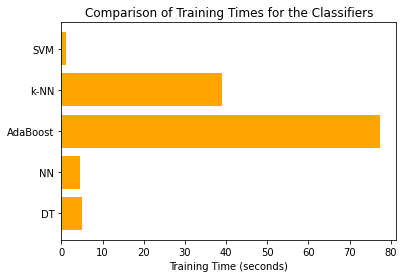

In [85]:
plt.figure()
plt.barh(y_ticks, time_train, color='orange')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Training Times for the Classifiers')
plt.xlabel('Training Time (seconds)')
plt.savefig('../images/wq_training.png', dpi=300, bbox_inches='tight')
plt.show()

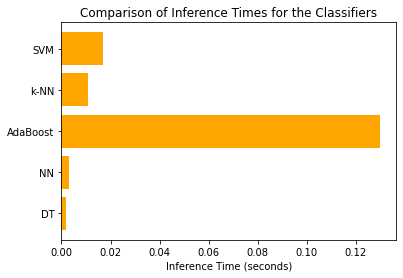

In [86]:
plt.figure()
plt.barh(y_ticks, time_infer, color='orange')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Inference Times for the Classifiers')
plt.xlabel('Inference Time (seconds)')
plt.savefig('../images/wq_inference.png', dpi=300, bbox_inches='tight')
plt.show()

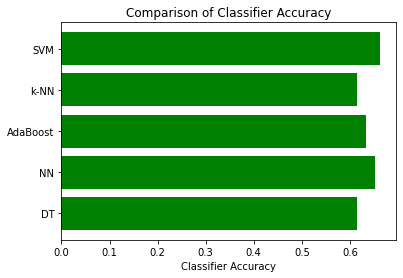

In [87]:
plt.figure()
plt.barh(y_ticks, classifier_accuracy, color='green')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of Classifier Accuracy')
plt.xlabel('Classifier Accuracy')
#plt.gca().set_xlim(0.94, 1.0)
plt.savefig('../images/wq_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
c_accuracy = [0.61564626, 0.65306122, 0.63265306, 0.61564626, 0.66326531]
c_time_train = [ 4.87200284,  4.39659834, 77.44754863, 39.09011626,  1.04486895]
c_time_infer = [0.00203562, 0.00303531, 0.13000107, 0.01099634, 0.01700044]

In [6]:
df = pd.DataFrame()
df['Classifier'] = classifiers
df['f1_micro Score'] = c_accuracy
df['Time Train'] = c_time_train
df['Time Infer'] = c_time_infer
df

Classifier  f1_micro Score  Time Train  Time Infer
0         DT        0.615646    4.872003    0.002036
1         NN        0.653061    4.396598    0.003035
2   AdaBoost        0.632653   77.447549    0.130001
3       k-NN        0.615646   39.090116    0.010996
4        SVM        0.663265    1.044869    0.017000

In [9]:
cm = sns.light_palette('green', as_cmap='True')
s = df.style.background_gradient(cmap=cm)
s

In [11]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'f1_micro Score', data=df)

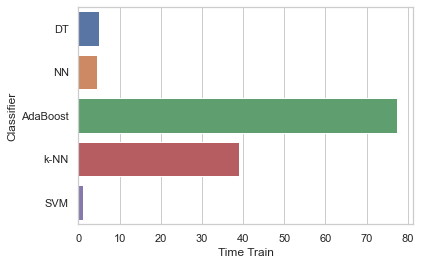

In [12]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'Time Train', data=df)

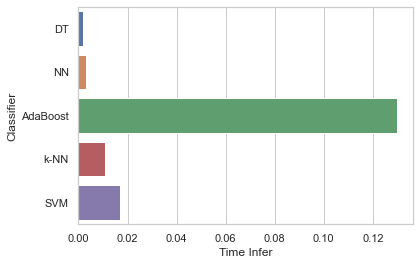

In [13]:
sns.set(style='whitegrid')
ax = sns.barplot(y='Classifier', x= 'Time Infer', data=df)

In [2]:
classifiers = ('DT', 'NN', 'AdaBoost', 'k-NN', 'SVM')
c_precesion = [0.64, 0.66, 0.65, 0.62, 0.66]
c_recall = [ 0.62,  0.65, 0.63, 0.62,  0.66]
c_f1_score = [0.62, 0.66, 0.63, 0.62, 0.66]

In [3]:
df2 = pd.DataFrame()
df2['Classifier'] = classifiers
df2['precesion'] = c_precesion
df2['recall'] = c_recall
df2['f1-score'] = c_f1_score
df2

Classifier  precesion  recall  f1-score
0         DT       0.64    0.62      0.62
1         NN       0.66    0.65      0.66
2   AdaBoost       0.65    0.63      0.63
3       k-NN       0.62    0.62      0.62
4        SVM       0.66    0.66      0.66

In [4]:
cm = sns.light_palette('green', as_cmap='True')
s = df2.style.background_gradient(cmap=cm)
s

<h1>XGBoost</h1>

In [25]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=data_tree,y=y)):
    
    X_train=data_tree.loc[trn_,feature_col_tree]
    y_train=data_tree.loc[trn_,target]
    
    X_valid=data_tree.loc[val_,feature_col_tree]
    y_valid=data_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        82
           1       0.93      0.76      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 1 : 0.845767575322812
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        82
           1       0.94      0.80      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.88      0.86      0.86       184

The accuracy for 2 : 0.8714729794356767
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        82
           1       0.76      0.97      0.85       102

    accuracy                           0.82   

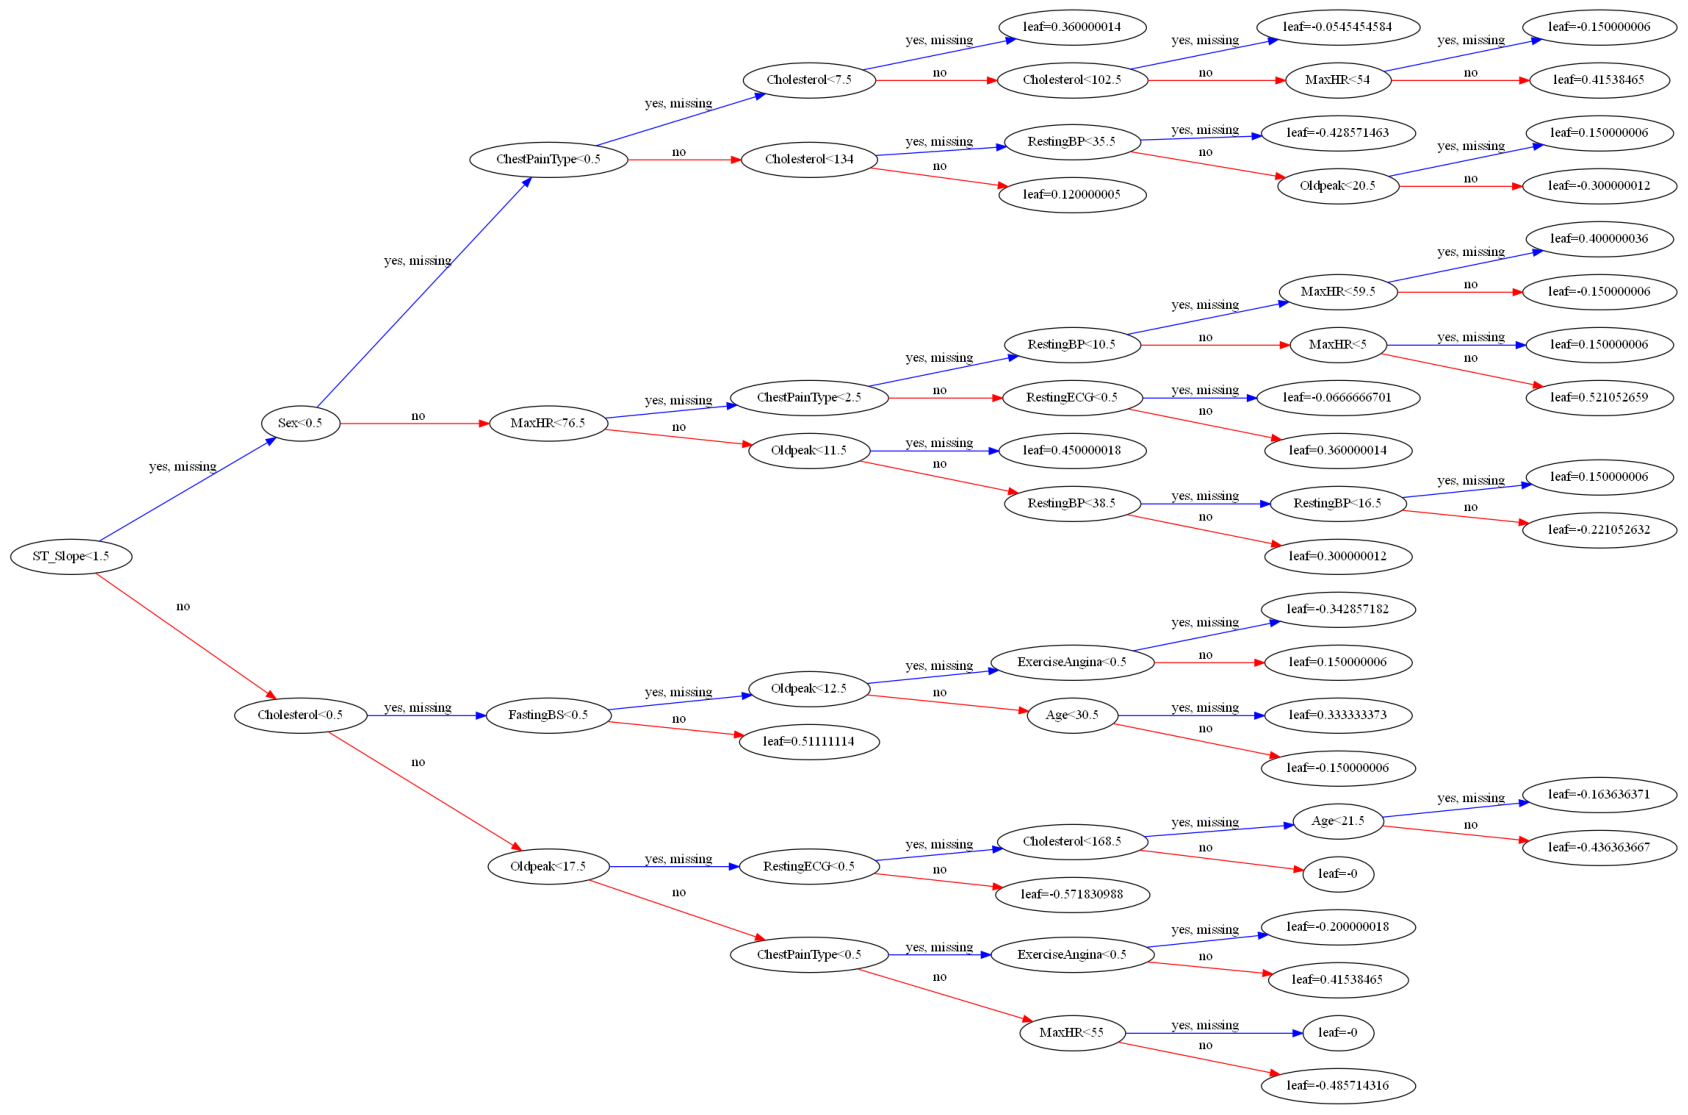

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()